<a href="https://colab.research.google.com/github/Uzma-Jawed/ML-using-Python/blob/main/Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning using Python

## Detecting and Preventing Overfitting and Underfitting

In this notebook, we will explore how to **detect and prevent overfitting/underfitting** using a Decision Tree classifier.  

We will cover:  
1. Generating a **synthetic dataset** for classification  
2. Training decision trees with different **depths**  
3. Detecting **overfitting vs underfitting** using train/test accuracy  
4. **Hyperparameter tuning** with GridSearchCV  
5. Evaluating models with **cross-validation**  
6. Analyzing **feature importance** for interpretability  

📌 Goal: Learn how to balance **model complexity** so the model performs well not just on training data, but also on unseen test data (i.e., generalization).


---

### 1. Importing Required Libraries
We will use:
- `sklearn.datasets.make_classification` → to generate synthetic classification data  
- `train_test_split` → to split data into train & test sets  
- `DecisionTreeClassifier` → our ML model  
- `accuracy_score` → to measure performance  
- `matplotlib` → for visualization


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

---

### 2. Generating Synthetic Dataset

We create a classification dataset with:
- **9000 samples**  
- **18 features** in total  
- **4 informative** features (actually useful for classification)  
- **12 redundant** features (linear combinations of informative ones)

This helps us simulate a realistic dataset.


In [ ]:
X, y = make_classification(n_samples = 9000, n_features = 18, n_informative = 4, n_redundant = 12, random_state = 4)

---

### 3. Splitting the Dataset
We divide the dataset into:
- **70% training set** → used to fit the model  
- **30% testing set** → used to evaluate model performance


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

---

### 4. Training and Evaluating with Different Depths

A decision tree’s complexity is controlled by `max_depth`:
- Very **small depth** → underfitting (model too simple).  
- Very **large depth** → overfitting (model memorizes training data).

We will:
- Train decision trees with depths from **1 to 20**.  
- Record **training accuracy** and **testing accuracy**.  
- Compare them to detect overfitting or underfitting.


In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
values = [i for i in range(1, 21)]

In [ ]:
for i in values:
    # define model with max_depth = i
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    # accuracy on training set
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)

    # accuracy on test set
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)

    # store results
    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print('>Depth=%d, Train Accuracy=%.3f, Test Accuracy=%.3f' % (i, train_acc, test_acc))

>Depth=1, Train Accuracy=0.842, Test Accuracy=0.824
>Depth=2, Train Accuracy=0.859, Test Accuracy=0.837
>Depth=3, Train Accuracy=0.883, Test Accuracy=0.860
>Depth=4, Train Accuracy=0.908, Test Accuracy=0.886
>Depth=5, Train Accuracy=0.917, Test Accuracy=0.894
>Depth=6, Train Accuracy=0.928, Test Accuracy=0.899
>Depth=7, Train Accuracy=0.945, Test Accuracy=0.913
>Depth=8, Train Accuracy=0.962, Test Accuracy=0.928
>Depth=9, Train Accuracy=0.970, Test Accuracy=0.927
>Depth=10, Train Accuracy=0.976, Test Accuracy=0.931
>Depth=11, Train Accuracy=0.983, Test Accuracy=0.937
>Depth=12, Train Accuracy=0.987, Test Accuracy=0.934
>Depth=13, Train Accuracy=0.990, Test Accuracy=0.938
>Depth=14, Train Accuracy=0.993, Test Accuracy=0.932
>Depth=15, Train Accuracy=0.994, Test Accuracy=0.931
>Depth=16, Train Accuracy=0.998, Test Accuracy=0.933
>Depth=17, Train Accuracy=0.999, Test Accuracy=0.934
>Depth=18, Train Accuracy=0.999, Test Accuracy=0.928
>Depth=19, Train Accuracy=1.000, Test Accuracy=0.931
>D

---

### 5. Visualizing Results

We will now plot training vs testing accuracy.  

- If training accuracy is **much higher** than testing → **overfitting**.  
- If both accuracies are **low** → **underfitting**.  
- The goal is to find a **balance point** where both are high and close.


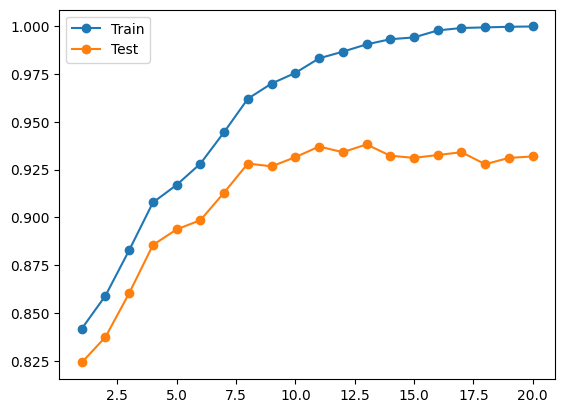

In [ ]:
pyplot.plot(values, train_scores, 'o-', label='Train')
pyplot.plot(values, test_scores, 'o-', label='Test')
pyplot.legend()
pyplot.show()

---

### 6. Hyperparameter Tuning with GridSearchCV

So far, we manually tested tree depths to detect overfitting and underfitting.  
Now, let’s use **GridSearchCV** from scikit-learn to automatically search for the **best combination of hyperparameters**.

We will tune:  
- `criterion` → splitting strategy (`gini`, `entropy`)  
- `max_depth` → maximum depth of the tree  
- `min_samples_split` → minimum samples needed to split a node  

GridSearchCV will:  
- Train multiple models on different parameter combinations  
- Perform **3-fold cross-validation**  
- Select the model with the **highest accuracy**


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 10, 20],
    'min_samples_split': [5, 10, 20, 50, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV with 3-fold cross-validation
clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

In [ ]:
# Fit to training data
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
# Best model found by GridSearch
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20)

---

### 7. Evaluating the Best Model

Now let’s check how well the best model (selected by GridSearchCV) performs on both training and test sets.


In [ ]:
# Accuracy on training and test sets
print("Train Accuracy:", accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

Train Accuracy: 0.9665079365079365
Test Accuracy: 0.9388888888888889


---

### 8. Cross-Validation Accuracy Across Depths

So far, GridSearchCV picked the best hyperparameters for us.  
But let’s also **visualize cross-validation accuracy** across different tree depths to see how performance changes.

This gives a clearer picture of where the model starts to **overfit or underfit**.


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
cv_scores = []
depth_values = [i for i in range(1, 21)]

In [ ]:
for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

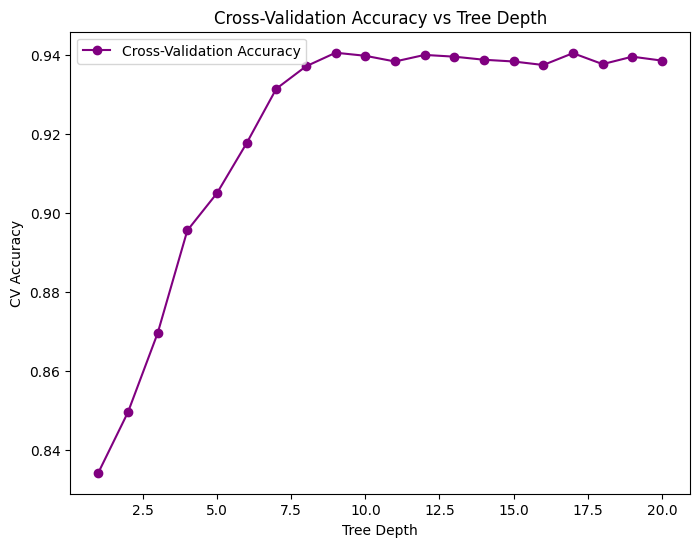

In [ ]:
# Plot CV accuracy across depths
pyplot.figure(figsize=(8,6))
pyplot.plot(depth_values, cv_scores, 'o-', label='Cross-Validation Accuracy', color="purple")
pyplot.xlabel("Tree Depth")
pyplot.ylabel("CV Accuracy")
pyplot.title("Cross-Validation Accuracy vs Tree Depth")
pyplot.legend()
pyplot.show()

In [ ]:
# Best depth according to CV
best_cv_depth = depth_values[np.argmax(cv_scores)]
best_cv_acc = max(cv_scores)
print(f"✅ Best Depth (CV): {best_cv_depth} with Accuracy = {best_cv_acc:.3f}")

✅ Best Depth (CV): 9 with Accuracy = 0.941


---

### 9. Feature Importance from the Best Model

Now that we have tuned the hyperparameters, let’s check **which features contribute most** to the decision tree’s predictions.  

This is important because:
- It helps us understand the model.  
- We can identify which features are more **informative** and which are less useful.


In [ ]:
import pandas as pd

In [ ]:
# Extract feature importances
importances = clf.best_estimator_.feature_importances_

In [ ]:
# Create a dataframe for better visualization
feature_importances = pd.DataFrame({
    "Feature": [f"Feature_{i}" for i in range(X.shape[1])],
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [ ]:
# Show top 10 features
print("Top 10 Important Features:")
display(feature_importances.head(10))

Top 10 Important Features:


,Feature,Importance
7,Feature_7,0.455936
8,Feature_8,0.102203
5,Feature_5,0.091880
13,Feature_13,0.083148
12,Feature_12,0.079092
9,Feature_9,0.067940
14,Feature_14,0.042862
11,Feature_11,0.016170
10,Feature_10,0.015759
15,Feature_15,0.010305


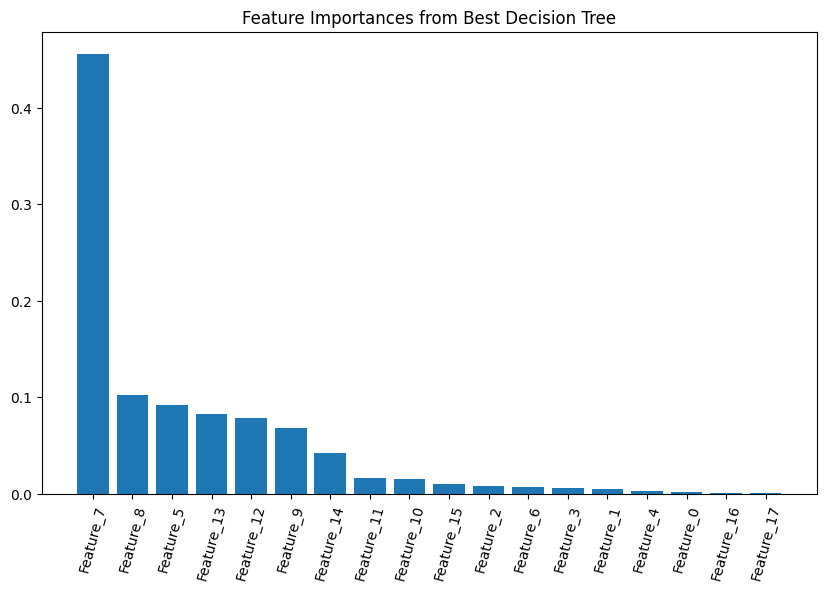

In [ ]:
# Plot feature importances
pyplot.figure(figsize=(10,6))
pyplot.bar(feature_importances["Feature"], feature_importances["Importance"])
pyplot.xticks(rotation=75)
pyplot.title("Feature Importances from Best Decision Tree")
pyplot.show()

---

## 🔑 Final Takeaways

- **Underfitting** happens when the model is too simple → low accuracy on both train & test.  
- **Overfitting** happens when the model is too complex → high train accuracy but low test accuracy.  
- By tuning hyperparameters with **GridSearchCV** and verifying with **cross-validation**, we found the optimal tree depth.  
- **Feature importance** gives us insights into which features matter most for predictions.  

✅ The goal of machine learning is not just high training accuracy, but **generalization** → performing well on unseen data.  


---

